<h1> Character recognition using image processing and sklearn libraries. </h1>

In [1]:
path_train_data = "images/Train/"
path_test_data = "images/Validation"

In [2]:
import string

In [3]:
list(string.ascii_uppercase)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [4]:
data_labels = ["@","&","#","$","0","1","2","3","4","5","6","7","8","9"]

In [5]:
data_labels.extend(list(string.ascii_uppercase))

In [6]:
data_labels

['@',
 '&',
 '#',
 '$',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [7]:
data_labels.remove("O")

In [8]:
import cv2
import os
import numpy as np
import time

In [9]:
### Training data ####
tic = time.time()
train_labels = []
train_data = []
img_resize = 32
flatten_img_array = ""
count = 0
for label in data_labels:
    path = os.path.join(path_train_data,label)
    for img in os.listdir(path):
        try:
            img_path = os.path.join(path,img)
            img_array = cv2.imread(img_path)
            resized_img_array = cv2.resize(img_array,(img_resize,img_resize))
            flatten_img_array = resized_img_array.flatten()
            train_data.append(flatten_img_array)
            train_labels.append(label)
            count += 1
            if(count == 4000):
                count = 0
                break
        except Exception as e:
            print(e)
            pass
        

#cv2.imshow("Hello",resized_img_array)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
toc = time.time()
print("Time Taken for training: " + str(toc-tic))

Time Taken for training: 407.0290892124176


In [10]:
train_data = np.squeeze(np.array(train_data))

In [11]:
train_data.shape

(156000, 3072)

In [12]:
len(train_labels)

156000

In [13]:
### Testing data ####
tic = time.time()
test_labels = []
test_data = []
img_resize = 32
flatten_img_array = ""
count = 0
for label in data_labels:
    path = os.path.join(path_test_data,label)
    for img in os.listdir(path):
        try:
            img_path = os.path.join(path,img)
            img_array = cv2.imread(img_path)
            resized_img_array = cv2.resize(img_array,(img_resize,img_resize))
            flatten_img_array = resized_img_array.flatten()
            test_data.append(flatten_img_array)
            test_labels.append(label)
            """
            count += 1
            if(count == 500):
                count = 0
                break"""
        except Exception as e:
            print(e)
            pass
        

#cv2.imshow("Hello",resized_img_array)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
toc = time.time()
print("Time Taken for testing: " + str(toc-tic))

Time Taken for testing: 67.3389298915863


In [14]:
test_data = np.squeeze(np.array(test_data))

In [15]:
test_data.shape

(22524, 3072)

In [16]:
len(test_labels)

22524

In [17]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

In [18]:
label_train = enc.fit_transform(np.array(train_labels))
label_test = enc.transform(np.array(test_labels))

In [19]:
label_train

array([13, 13, 13, ..., 38, 38, 38], dtype=int64)

In [20]:
label_test

array([13, 13, 13, ..., 38, 38, 38], dtype=int64)

In [21]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(train_data,label_train,test_size=0.1,random_state=0)

In [22]:
train_data.shape 

(156000, 3072)

In [23]:
label_train.shape

(156000,)

In [24]:
test_data.shape

(22524, 3072)

In [25]:
label_test.shape

(22524,)

In [26]:
#normalize data
tic = time.time()
train_data_norm = train_data / 255.
test_data_norm = test_data / 255.
toc = time.time()
print("Time Taken to normalize: " + str(toc-tic))

Time Taken to normalize: 25.832756757736206


In [27]:
print(train_data_norm.shape)
print(test_data_norm.shape)

(156000, 3072)
(22524, 3072)


In [37]:
temp = [22]
temp = np.array(temp)

In [38]:
enc.inverse_transform(temp)

array(['I'], dtype='<U1')

In [30]:
tic = time.time()
from sklearn.svm import LinearSVC
svc_model = LinearSVC(C=2,max_iter=500)
svc_model.fit(train_data_norm,label_train)
toc = time.time()
predictions = svc_model.predict(test_data_norm)
print("Accuracy on Train: " + str(svc_model.score(train_data_norm,label_train)))
print("Accuracy on Test: " + str(svc_model.score(test_data_norm,label_test)))
print("Time Taken: " + str(toc-tic))

C:\Users\Owner\anaconda3\envs\SE_project\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy on Train: 0.7438910256410256
Accuracy on Test: 0.6391404723850116
Time Taken: 3742.1213777065277


In [31]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix

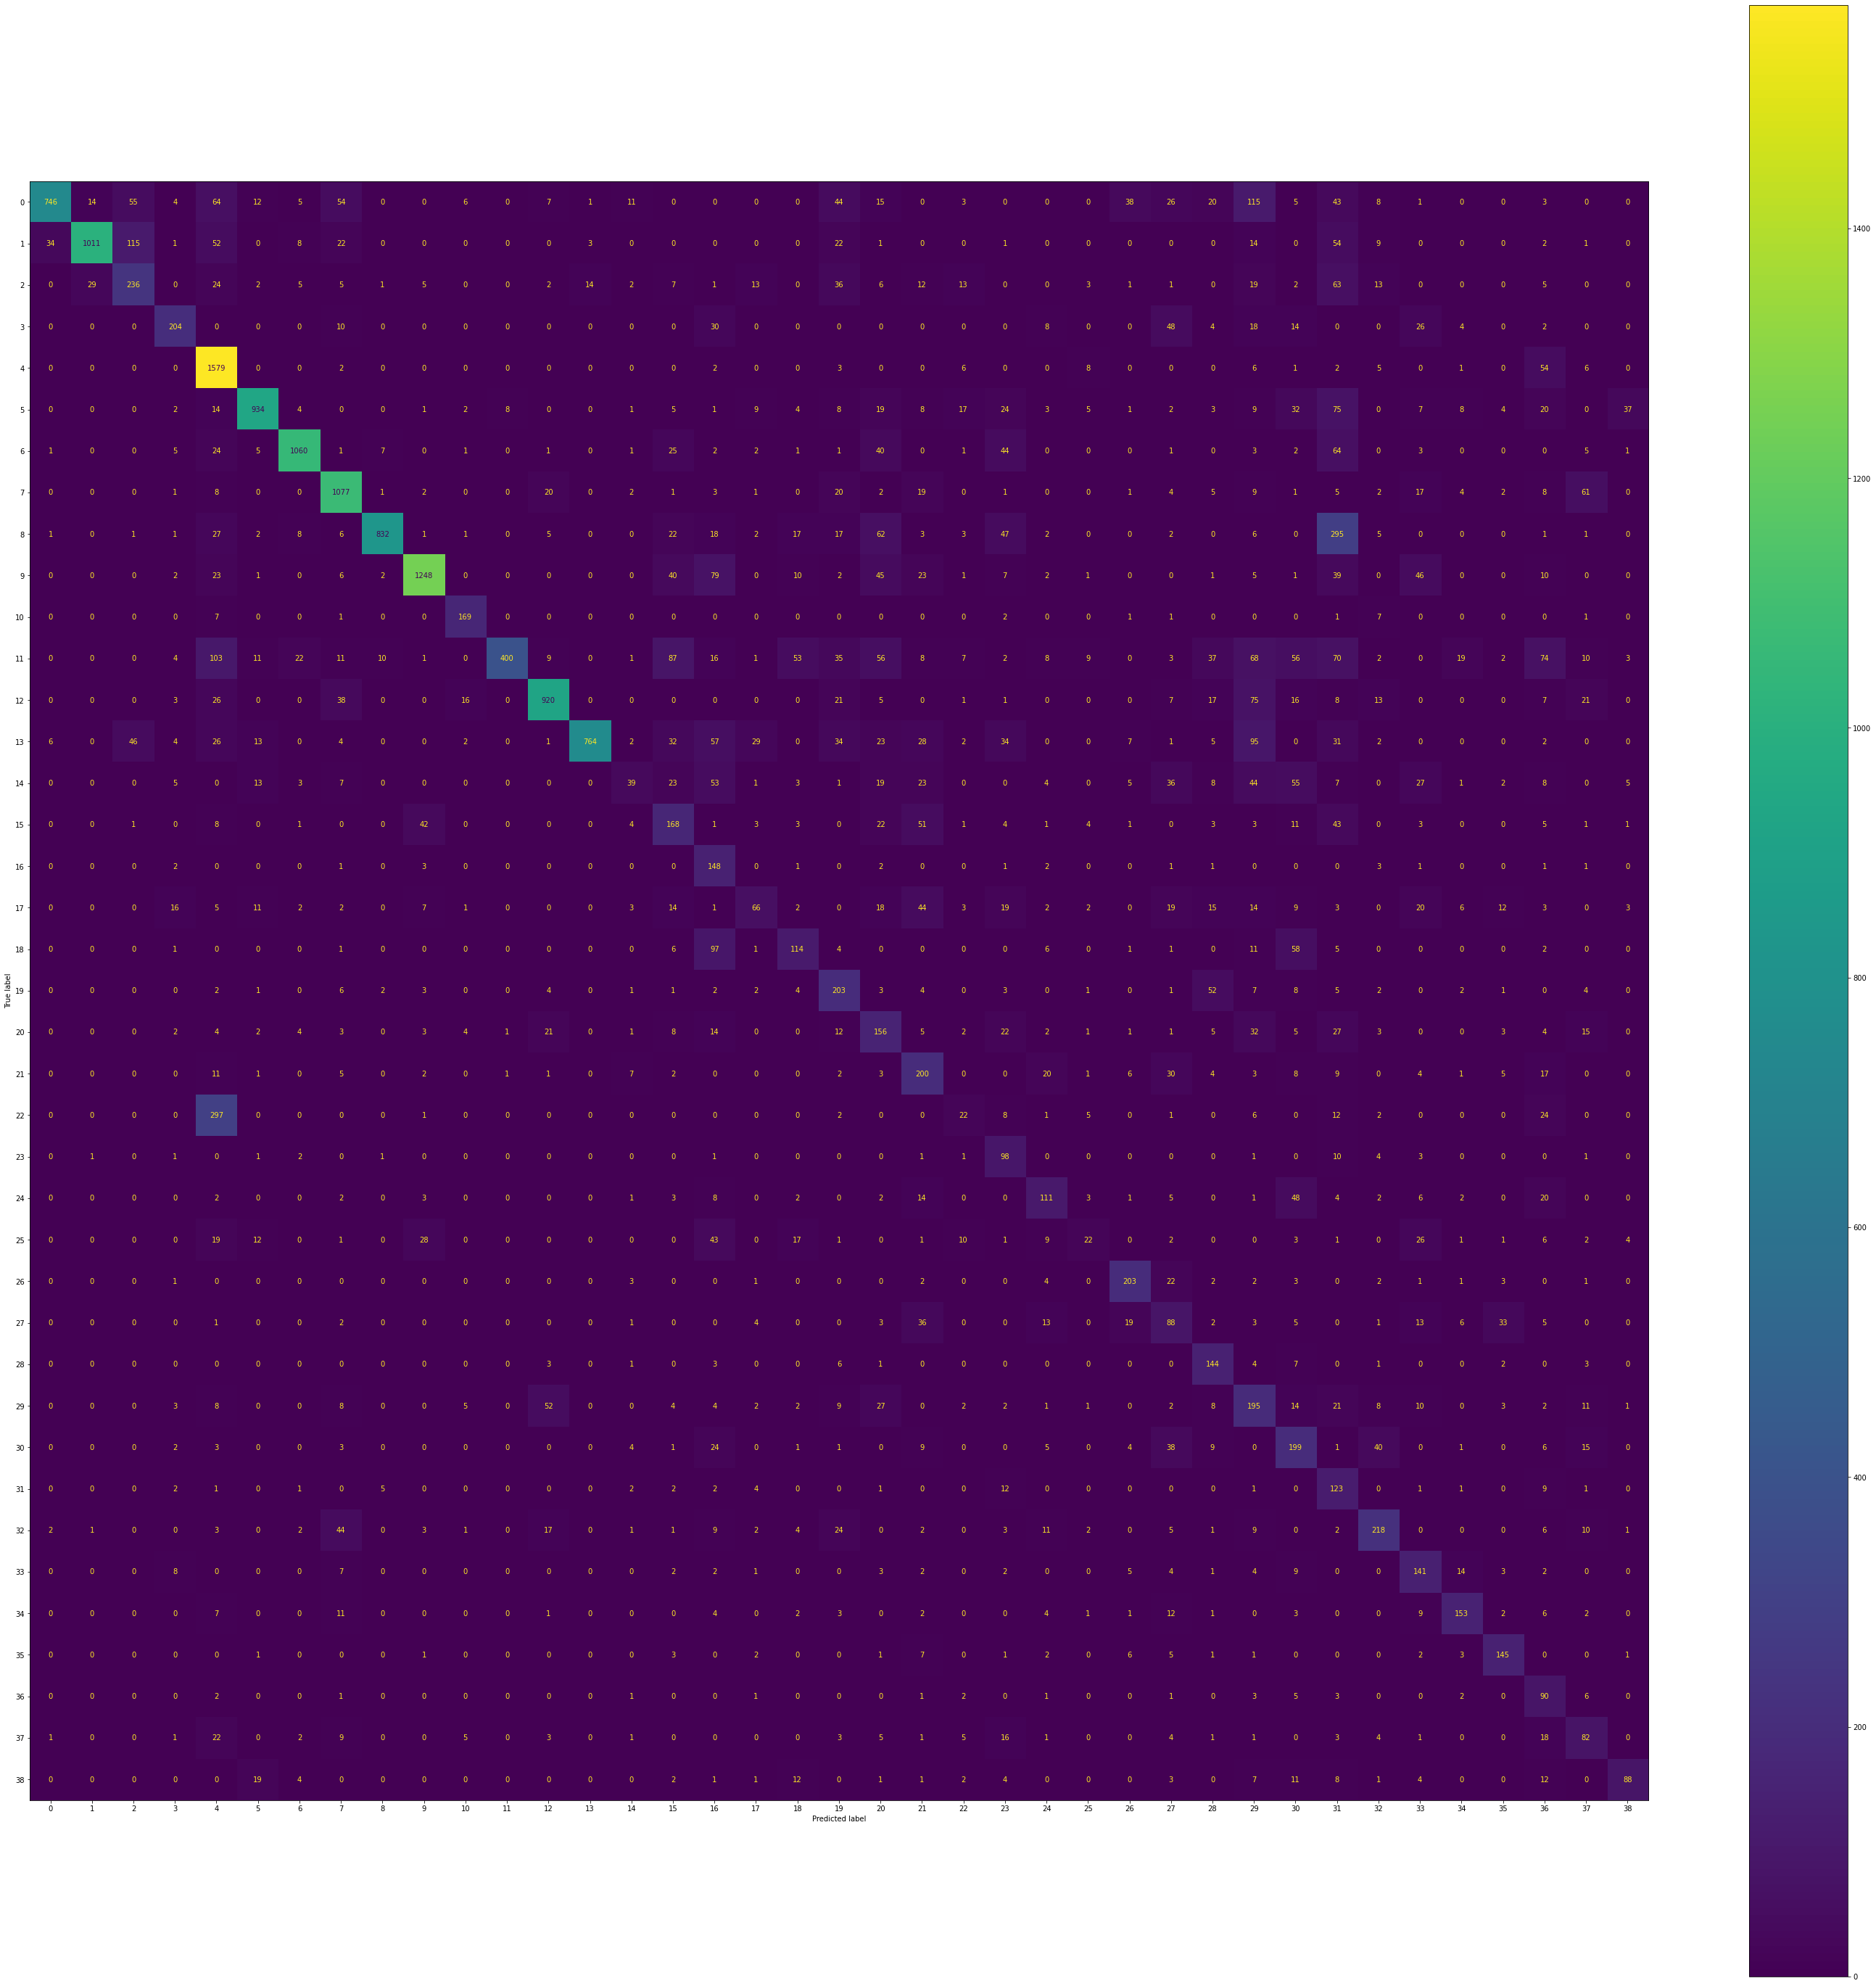

In [32]:
fig,ax = plt.subplots(figsize=(50,50))
plot_confusion_matrix(svc_model,test_data_norm,label_test,ax=ax)